## Explainable_CNN

- layer wise network visualization
- 현재, explainable-cnn는 single usable class로만 구성된다.
- CNN을 해석하기 위해 중간 층의 weight나 feature map을 확인.
    - 낮은 층에서는 선, 원 등 shape을 찾음.
    - 높은 층에서는 high level sementics를 찾음. (얼굴, 몸의 형태 등등)

In [1]:
from explainable_cnn import CNNExplainer
import pickle, torch
from torchvision import models
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
with open("./data/imagenet_class_labels.pkl", "rb") as label_file:
    imagenet_class_labels = pickle.load(label_file)
imagenet_class_labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [3]:
model = models.vgg16(pretrained=True)

C:\Users\jjoro\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jjoro\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
x_cnn = CNNExplainer(model, imagenet_class_labels)

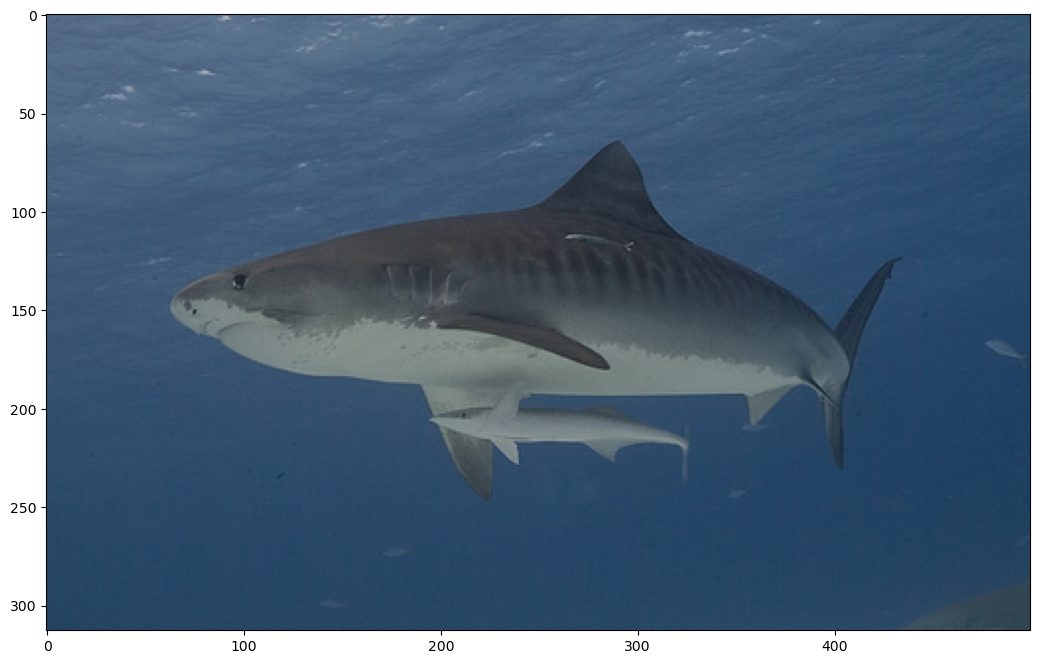

tiger shark, Galeocerdo cuvieri
500 313


In [6]:
## Load a sample image
image = Image.open('./data/tiger_shark.jpeg').convert('RGB')

plt.figure(figsize=(15, 8))
plt.imshow(image)
plt.show()

print(imagenet_class_labels[3])

w, h = image.size
print(w, h)

## Saliency Maps

- Create heatmap which denotes the area of image where human eye focuses first.
- 사람이 보기에 가장 중요한 위치에 대한 plot.

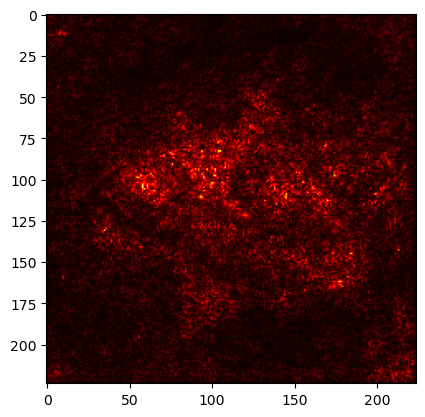

In [9]:
saliency_map = x_cnn.get_saliency_map(
    "./data/tiger_shark.jpeg",
    3, # Label corresponding to Shark.
    (224, 224)
)

plt.imshow(saliency_map, cmap='hot')

## Guided Backpropagation

- Similar technique which combines Vanilla Backpropagation and Deconvolution.
- Guided Backpropagation supports only for entirely for model and not layer-wise.

C:\Users\jjoro\anaconda3\lib\site-packages\torch\nn\modules\module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


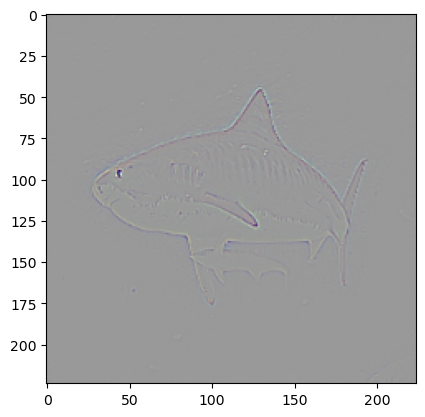

In [10]:
guided_backprop = x_cnn.get_guided_back_propagation(
    "./data/tiger_shark.jpeg",
    3,
    (224, 224)
)

plt.imshow(guided_backprop.astype('uint8'))

## Grad CAM

- More sophisticated technique to draw visualization based on class confidence over an image.
- Unlike above two, Grad CAM supports layer-wise image extraction.

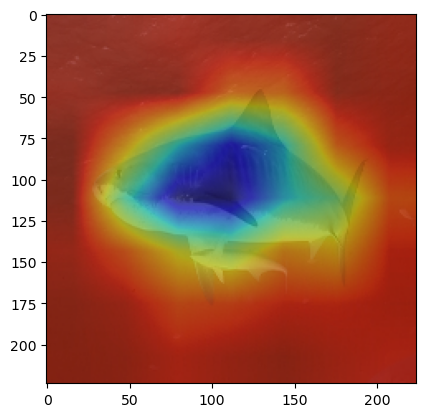

In [11]:
grad_cam = x_cnn.get_grad_cam(
    "./data/tiger_shark.jpeg",
    3,
    (224, 224),
    ["features"] # List of layer names for which you want to generate image.
)

# List of images (numpy array)
plt.imshow(grad_cam[0].astype('uint8'))

## Guided Grad CAM

- Gradient-weighted class activation class activation.
    - which combines Guided Backpropagation and Grad CAM functionality.

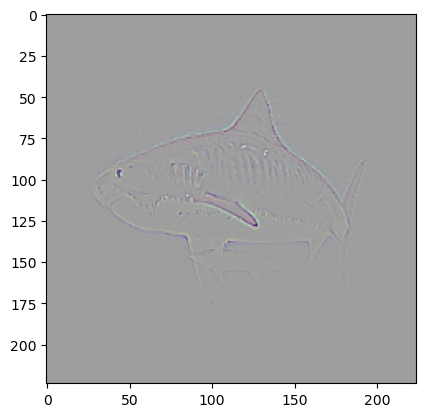

In [12]:
model
guided_grad_cam = x_cnn.get_guided_grad_cam(
    "./data/tiger_shark.jpeg",
    3,
    (224, 224),
    ["features"]
)

plt.imshow(guided_grad_cam[0].astype('uint8'))

## Layerwise Comparison

- Draw layerwise comparison of Grad CAM and Guided Grad CAM plots.
    - easily understand the working of CNN model.

In [13]:
model = models.resnet50(pretrained=True)
model

C:\Users\jjoro\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\jjoro/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
x_cnn = CNNExplainer(model, imagenet_class_labels)

In [15]:
# Note that the name of layers should exactly match with model.
layers = ["relu", "layer1", "layer2", "layer3", "layer4"]

In [16]:
# Grad CAMs of the model
grad_cams = x_cnn.get_grad_cam(
    "./data/tiger_shark.jpeg",
    3,
    (224, 224),
    layers
)

# Guided Grad CAMs of the model
guided_grad_cams = x_cnn.get_guided_grad_cam(
    "./data/tiger_shark.jpeg",
    3,
    (224, 224),
    layers
)

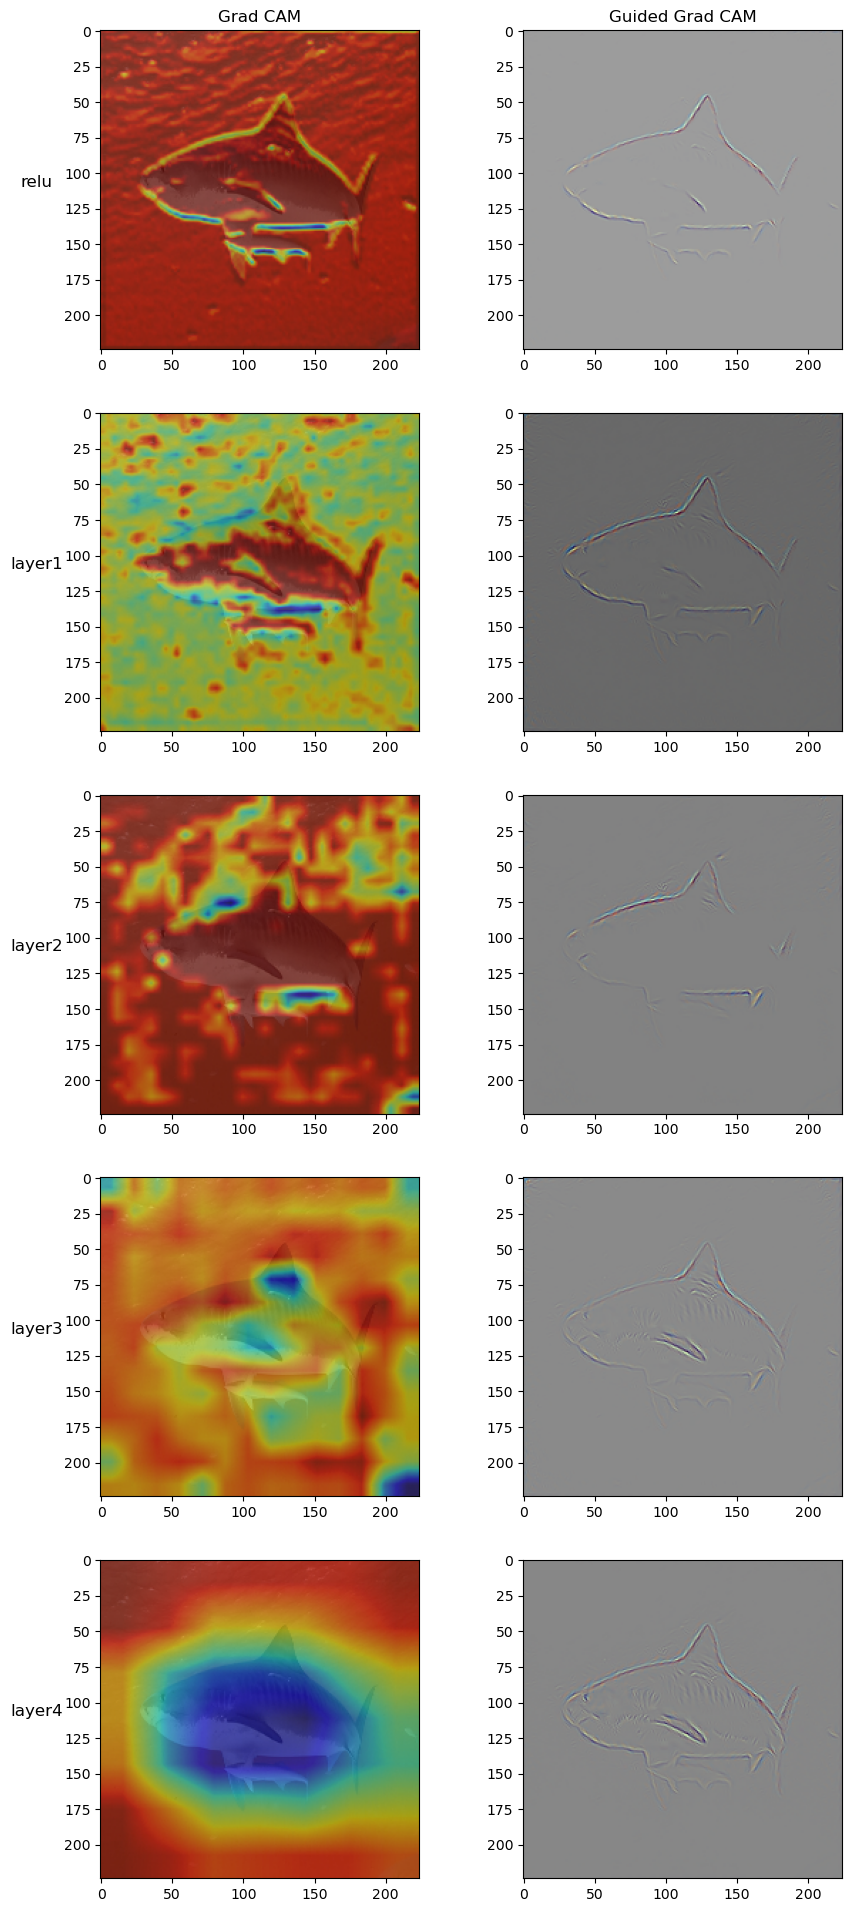

In [17]:
cols = ["Grad CAM", "Guided Grad CAM"]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 24))

for ax, col in zip(axes[0], cols):
    ax.set_title(col)
    
for ax, row in zip(axes[:,0], layers):
    ax.set_ylabel(row, rotation=0, size='large', labelpad=20)
    
for ax, cam in zip(axes[:, 0], grad_cams):
    ax.imshow(cam.astype('uint8'))

for ax, gcam in zip(axes[:, 1], guided_grad_cams):
    ax.imshow(gcam.astype('uint8'))

# plt.xlabel("x",labelpad=10)

- 후 layer로 갈수록 중요한 feature에 대한 feature map.